In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd

import json

import copy
import matplotlib as mpl

In [2]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]
single_anode_channel = int(json_file["single_anode_channel"])
number_tubes_json = len(json_file["tubes"])

#opening the file

dictionary_path = home_path+'processed_data/Dados BC1/'
file = open(dictionary_path+name_json+'_separate.pkl','rb')
results = pickle.load(file)
#Path to the channel reading mapping file
map_path = home_path+'processed_data/Dados BC1/mapping.txt'
pixel_map = np.loadtxt(map_path)

In [4]:
position=pixel_map[pixel_map!=0]

In [107]:
cell = 'C'
data = results["Data"+cell]["data"][0][:,(position.astype(int)-1)]
single_anode = results["Data"+cell]["data"][0][:,2]

In [116]:
pos=[]
for i in range(len(data.T)):
    if (data[:,i].max()>(data[:,i].mean()+0.15*data[:,i].mean())):
        pos.append(i+1)
pos=np.asarray(pos)

In [117]:
pos

array([14, 15, 21, 22, 23, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 42, 43,
       44, 45, 46])

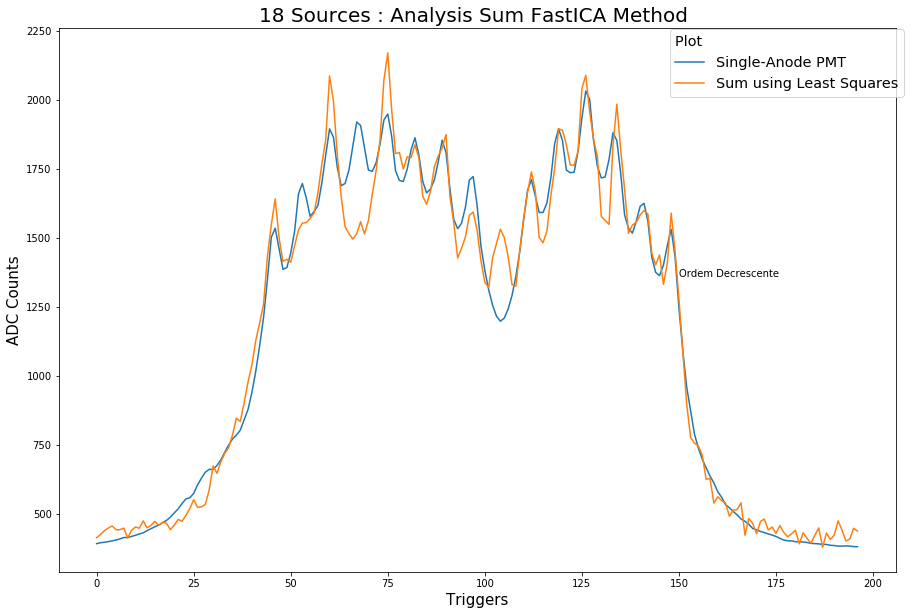

<Figure size 1080x720 with 0 Axes>

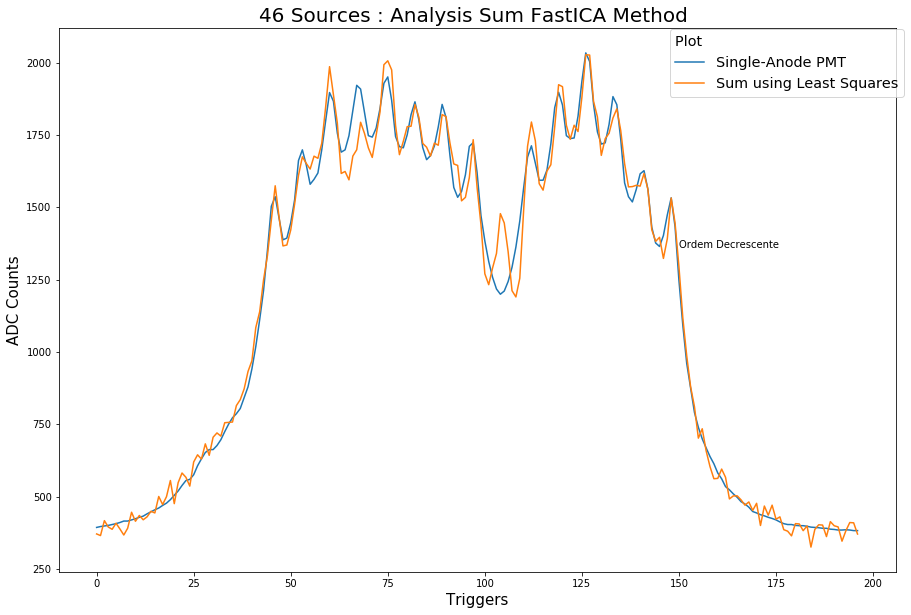

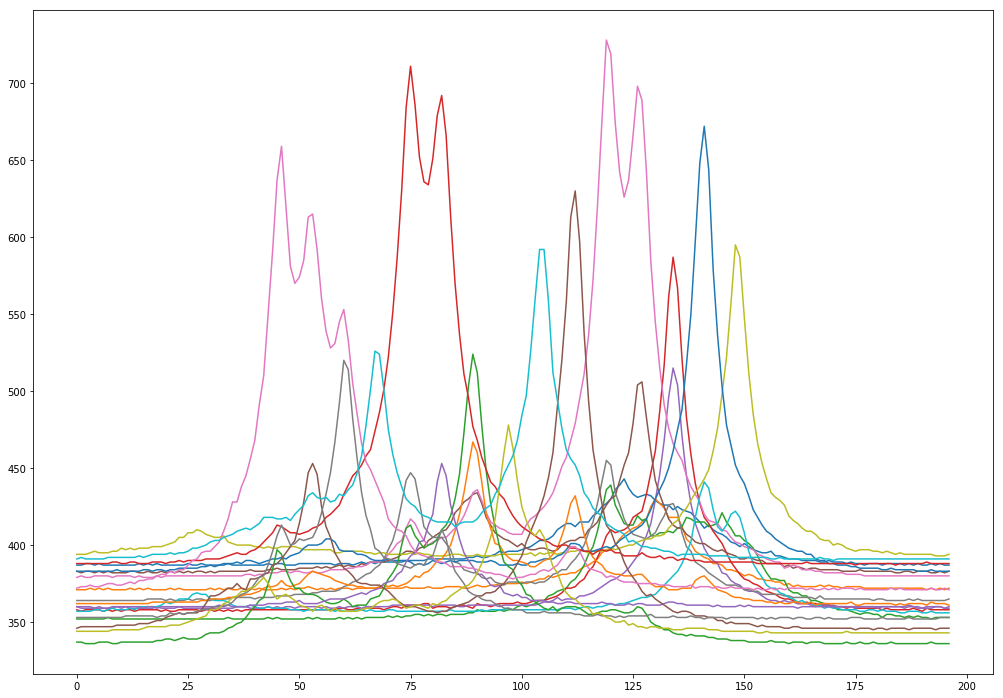

In [118]:
plt.plot(data[:,(pos-1)])
plt.show()

In [119]:
def image_plot(sources,single_anode):

    coeff=np.linalg.lstsq((sources.T),single_anode)[0]
    sums=0
    sums_normal=0
    for i in range(len(coeff)):
        sums=sums + coeff[i]*sources[i]
        sums_normal = sums_normal + sources[i]
    print coeff
    plt.figure(figsize=(15,10))
    plt.plot(single_anode,label='Single-Anode PMT' )
    plt.plot(sums,label='Sum using Least Squares')

    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"
    plt.title(str(len(coeff))+' Sources :'+' Analysis Sum FastICA Method ', fontsize = 20)

    # hide tick and tick label of the big axes
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/sum data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   ######################################################################################################################
    fig, ax1 = plt.subplots(figsize=(15,10))

    color = 'tab:orange'
    ax1.set_xlabel('Triggers')
    ax1.set_ylabel('ADC Counts', color=color)
    ax1.plot(sums_normal, color=color,label = 'Sum')
    ax1.tick_params(axis='y', labelcolor=color)
    
    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('ADC Counts', color=color)  # we already handled the x-label with ax1
    ax2.plot(single_anode, color=color,label='Single-Anode PMT' )
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
   

    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/Wsum data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   


    plt.clf()


In [120]:
image_plot(data[:,(pos-1)].T,single_anode)

[-15.55492205   9.01564018  -3.16799771  30.32699602 -34.74546838
   1.40424974   4.1630161   -7.29118045   7.28146544 -12.19099054
   6.06772426  -2.25561893   4.95621282   5.15136427  -7.98759565
   3.1132133    0.47523773   5.46724903   4.5867655    2.05189931]


In [121]:
image_plot(data.T,single_anode)

[  8.47218287  -3.60684189  24.94729521 -17.69241248 -10.4957011
  -3.78256141 -16.85641431  12.40925423 -31.58168699  -4.12795442
 -21.29937661 -28.77194711  10.83661025   5.28419823   0.89028451
   4.47499283   6.04830442  11.88711797   3.55313096  -1.01388456
   0.12253058  -0.51481436   0.29223452 -16.92842025   4.03112481
   3.23645138  -0.2911227    6.32855305   0.03280431   7.07691433
   8.90408725   4.22092329  -7.88713392   2.7895859    7.67458429
  -2.2867565    0.87706147  -0.44498513   1.049631    23.10306378
  -3.899412     1.49562865   2.11131778   4.10554402   4.64828039
   3.10807411]
